In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sbs

In [2]:
df = pd.read_csv('./framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df = df.drop(columns=['education'])

In [4]:
print(df.shape)
df.info()

(4238, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df['prevalentStroke'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

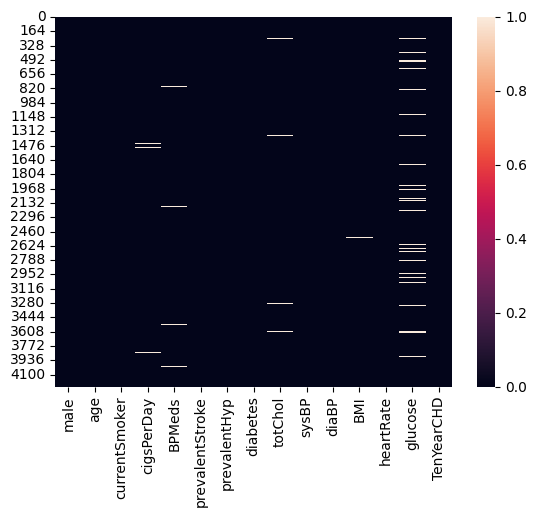

In [7]:
sbs.heatmap(df.isnull())

<AxesSubplot:>

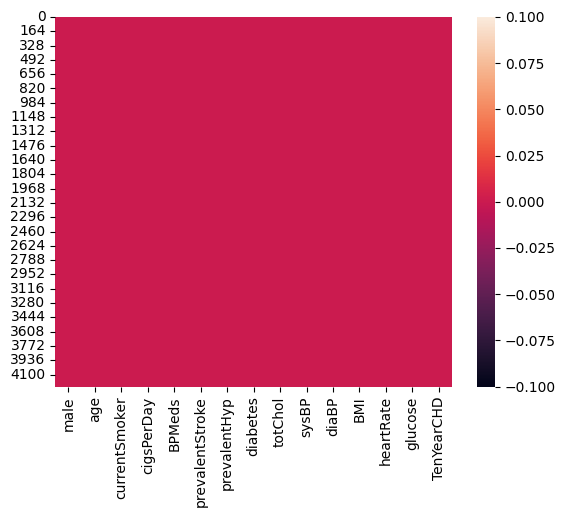

In [8]:
column_have_na = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']
for c in column_have_na:
    mean = df[c].mean()
    df[c] = df[c].fillna(mean)
df.isnull().sum()
sbs.heatmap(df.isnull())

In [11]:
x=df.iloc[:,:]
y=df['TenYearCHD']

In [12]:
x = x.drop(columns=['TenYearCHD'])

In [13]:
x.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3178, 14)
(1060, 14)
(3178,)
(1060,)


In [22]:
from pandas import array
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Training
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


c:\Users\Vu Minh Nhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model.score(X_test, y_test)

0.8320754716981132

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [18]:
model.fit(X_test, y_test)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

1.0